# Load Packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


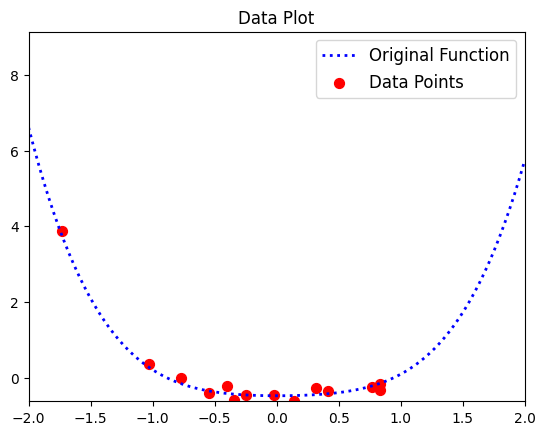

In [3]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [8]:
degree = 4
A = np.zeros((n_data, degree+1)) # Dummy initialization
for i in range(degree + 1):
    A[:, i] = x_data ** i

### Print results (do not modify the following block)

In [11]:
A = np.array([[1.0, 0.18518519, 0.03432483, 0.00634921, 0.00117426],
              [1.0, 0.43209877, 0.18649758, 0.08070816, 0.03491696],
              [1.0, 0.67901235, 0.46158358, 0.31325238, 0.21302729],
              [1.0, 0.92592593, 0.85714286, 0.79331043, 0.73353115],
              [1.0, 1.17283951, 1.37350498, 1.60828989, 1.88301092],
              [1.0, 1.41975309, 2.01561723, 2.86264266, 4.06504262],
              [1.0, 1.66666667, 2.77777778, 4.62962963, 7.71604938],
              [1.0, 1.91358025, 3.66255144, 7.02479884, 13.44835723],
              [1.0, 2.16049383, 4.67082591, 10.08113678, 21.76227557],
              [1.0, 2.40740741, 5.80223923, 13.97905046, 33.68047913],
              [1.0, 2.65432099, 7.05643039, 18.73892346, 49.80199992],
              [1.0, 2.90123457, 8.43303839, 24.56512851, 71.26454695],
              [1.0, 3.14814815, 9.93170219, 31.56903842, 99.35217707],
              [1.0, 3.39506173, 11.55206079, 39.86002499, 135.3933102],
              [1.0, 3.64197531, 13.29375316, 49.54645902, 180.83404403]])

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [14]:
# Initialize 'y_est' as a zero list
y_est = np.zeros_like(x_list)

# Compute the estimated function values 'y_est' corresponding to 'x_list'
for i in range(degree + 1):
    y_est += w_est[i] * (x_list ** i)


### Print results (do not modify the following block)

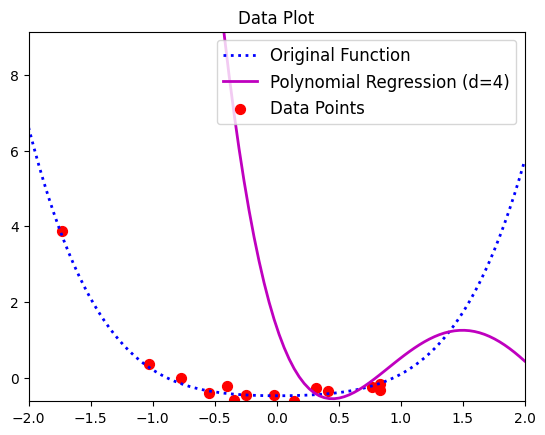

In [25]:
import matplotlib.pyplot as plt

plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")

plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))

plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")

plt.xlim([np.min(x_list), np.max(x_list)])
plt.ylim([np.min(y_data), np.max(y_data)])

plt.legend(prop={'size': 12})
plt.title("Data Plot")

# Show the plot
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [22]:
import numpy as np

degree1 = 1

A1 = np.zeros((n_data, degree1 + 1))

w_est1 = np.zeros(degree1 + 1)

for i in range(degree1 + 1):
    A1[:, i] = x_data ** i

w_est1 = np.linalg.lstsq(A1, y_data, rcond=None)[0]

y_est1 = np.zeros_like(x_list)
for i in range(degree1 + 1):
    y_est1 += w_est1[i] * (x_list ** i)

### Print results (do not modify the following block)

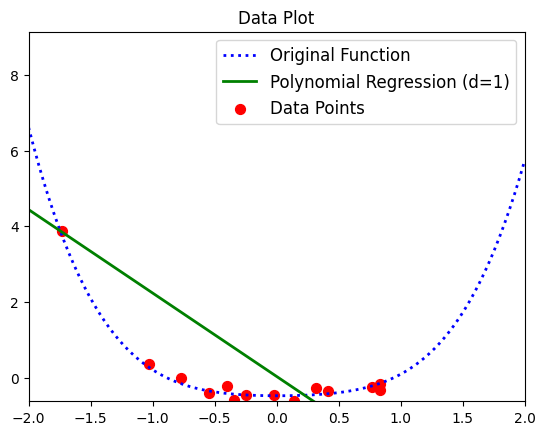

In [24]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list), np.max(x_list)])
plt.ylim([np.min(y_data), np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [29]:
degree2 = 10

A2 = np.zeros((n_data, degree2 + 1))

w_est2 = np.zeros(degree2 + 1)

for i in range(degree2 + 1):
    A2[:, i] = x_data ** i

w_est2 = np.linalg.lstsq(A2, y_data, rcond=None)[0]

y_est2 = np.zeros_like(x_list)
for i in range(degree2 + 1):
    y_est2 += w_est2[i] * (x_list ** i)

### Print results (do not modify the following block)

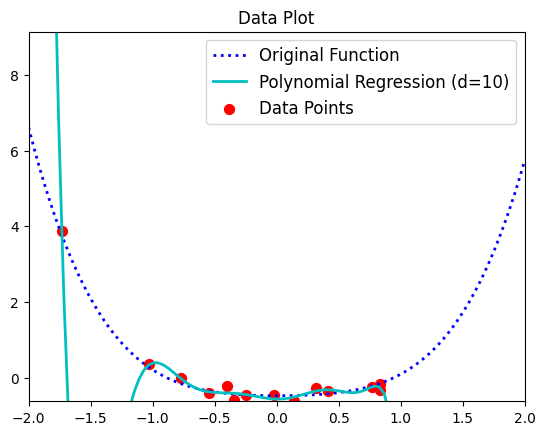

In [32]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list), np.max(x_list)])
plt.ylim([np.min(y_data), np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

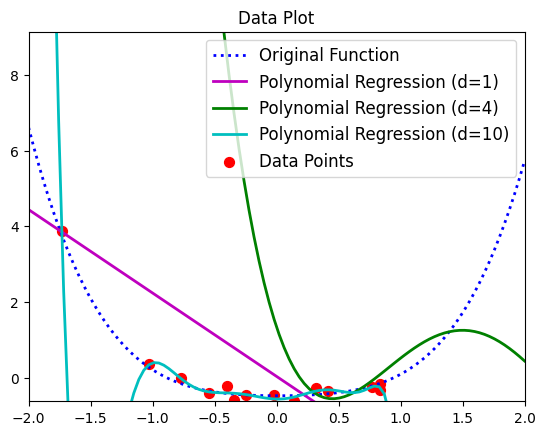

In [35]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Pros and Cons of High-Degree Polynomial:

Pros:
Flexibility: High-degree polynomials can approximate complex, non-linear relationships between features and target variables. They can closely fit the training data, capturing intricate patterns.
Low Training Error: High-degree polynomials often achieve very low training error, indicating that they fit the training data extremely well.
Cons:
Overfitting: One major drawback is overfitting. High-degree polynomials are prone to fitting noise in the data, leading to poor generalization to unseen data.
Instability: High-degree polynomials can result in instability in the model, where small changes in the input data lead to significant changes in the estimated function.
Computational Complexity: Estimating high-degree polynomial coefficients can be computationally expensive, especially with a large number of features.

Pros and Cons of Low-Degree Polynomial:

Pros:
Simplicity: Low-degree polynomials are simple and have fewer coefficients, making them less prone to overfitting.
Generalization: They have better generalization to unseen data, which is important for making accurate predictions.
Stability: Low-degree polynomials are more stable and less sensitive to small changes in the input data.
Cons:
Underfitting: Low-degree polynomials may underfit complex relationships in the data, resulting in high bias and poor model performance.
Higher Training Error: They might have higher training error, as they cannot capture all the nuances in the data.

The phenomenon observed in machine learning, where increasing the degree of a polynomial results in overfitting, is known as the Bias-Variance Tradeoff. 
It represents the balance between model simplicity (low-degree polynomials) and model complexity (high-degree polynomials) and the tradeoff between bias (systematic error) and variance (random error) in the model.